8-puzzle image solver

In [346]:
from matplotlib import pyplot as plt
image_parts={}

In [347]:
def splitting_image():
  #splitting image
  import cv2,time,numpy as np
  from PIL import Image

  img = cv2.imread('shape.jpg')
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img2 = img
  plt.imshow(img)
  plt.axis("off")
  plt.title("Actual Image")

  height, width, channels = img.shape
  # Number of pieces Horizontally
  W_SIZE  = 3
  # Number of pieces Vertically to each Horizontal
  H_SIZE = 3

  new_9th_block_height=0
  new_9th_block_width=0

  for ih in range(H_SIZE ):
    for iw in range(W_SIZE ):

        x = width/W_SIZE * iw
        y = height/H_SIZE * ih
        h = (height / H_SIZE)
        w = (width / W_SIZE )
        new_9th_block_height=int(h)
        new_9th_block_width=int(w)
        # print(x,y,h,w)
        img = img[int(y):int(y+h), int(x):int(x+w)]
        # NAME = str(time.time())
        image_parts[(((ih*H_SIZE)+iw+1))]=img
        cv2.imwrite(str(((ih*H_SIZE)+iw+1)) +  ".png",img)
        
        img = img2

  # new_9th_block=Image.new(mode="RGB",size=(new_9th_block_width,new_9th_block_height),color=(255,255,255))

  # cv2.imwrite("Output Images/9.png",new_9th_block)
  current_9th_block=cv2.imread("9.png")
  he,wi,ch=current_9th_block.shape
  new_9th_block=Image.new(mode="RGB",size=(wi,he),color=(0,0,0))
  new_9th_block.save("9.png")
  img_9=cv2.imread('9.png')
  image_parts[9]=img_9
  # plt.imshow(img_9)
  
    
  


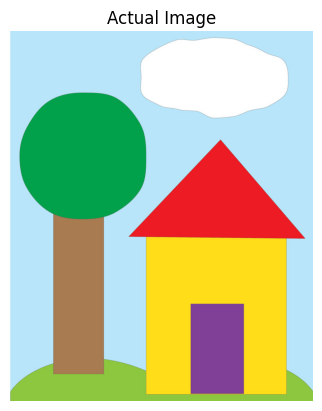

In [348]:
splitting_image()

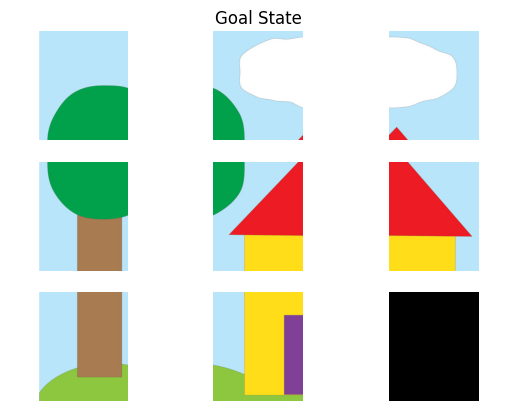

In [349]:
plt.title("Goal State")
plt.axis("off")
for ind in image_parts:
      plt.subplot(3,3,ind)
      plt.imshow(image_parts[ind])
      plt.axis("off")
      



import numpy as np
import random
l=np.arange(9)+1
l=list(l)
l[8]='_'
fin=l
fin=np.reshape(fin,(3,3))
#let f=final state
print('fin:',fin)


In [351]:
random.shuffle(l)
ini=l
initial_image_ind=l.copy()
ini=np.reshape(ini,(3,3))
#let i=initial state
print('ini:',ini)

initial_image_ind[initial_image_ind.index('_')]=9

ini: [['3' '8' '5']
 ['2' '6' '7']
 ['4' '1' '_']]


In [352]:
initial_image_ind

[3, 8, 5, 2, 6, 7, 4, 1, 9]

In [353]:
# ini=fin.copy()
# ini[2][2]=ini[1][2]
# ini[1][2]='_'
# print('ini:',ini)

In [354]:
# Use this cell to obtain a solvable start state for the puzzle
# count-steps:19
ini=['1','8','2','_','4','3','7','6','5'] 
ini=np.reshape(ini,(3,3))
ini
initial_image_ind=[1,8,2,9,4,3,7,6,5]


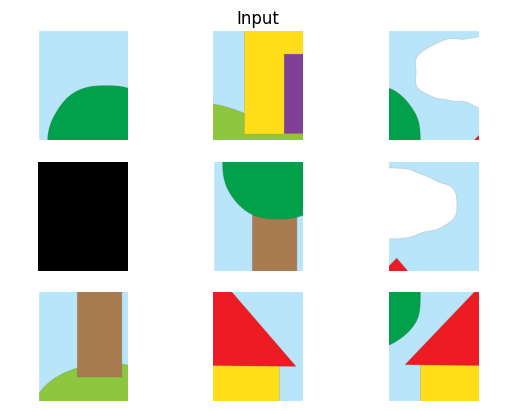

In [355]:
i=1
plt.title("Input")
for ind in initial_image_ind:
      plt.axis("off")
      # print(ind)
      plt.subplot(3,3,i)
      plt.imshow(image_parts[ind])
      plt.axis("off")
      i+=1

In [356]:
#calculating heuristic at each stage
def cal_heuri(curr):
    # curr=np.reshape(curr,(9,))
    # fin1=np.reshape(fin,(9,))
    h=0
    for i in np.arange(3):
      for j in np.arange(3):
        if(curr[i][j]!='_'):
          if(curr[i][j]!=fin[i][j]):
            h+=1
    return h


#finding index of '_'
def find_(curr):
    for i in np.arange(3):
        for j in np.arange(3):
            if(curr[i][j]=='_'):
                return i,j
    return -1


#generating children
def generate_chi(curr1,i,j):
    possibilities={ 'l':1,'r':1,'a':1,'b':1}
    # print('possibilities:',possibilities)

    if(i==0):
        possibilities['a']=0
    if(i==2):
        possibilities['b']=0
    if(j==0):
        possibilities['l']=0
    if(j==2):
        possibilities['r']=0

    # print('possibilities:',possibilities)

    chi=[]

    if(possibilities['l']==1):
      cp=curr1.copy()
      temp=cp[i][j-1]
      cp[i][j-1]=cp[i][j]
      cp[i][j]=temp
      chi.append(cp)
      # print(cp)
      # cp=curr1

    if(possibilities['r']==1):
      cp=curr1.copy()
      temp=cp[i][j+1]
      cp[i][j+1]=cp[i][j]
      cp[i][j]=temp
      chi.append(cp)
      # print(cp)
      # cp=curr1

    if(possibilities['a']==1):
      cp=curr1.copy()
      temp=cp[i-1][j]
      cp[i-1][j]=cp[i][j]
      cp[i][j]=temp
      chi.append(cp)
      # print(cp)
      # cp=curr1

    if(possibilities['b']==1):
      cp=curr1.copy()
      temp=cp[i+1][j]
      cp[i+1][j]=cp[i][j]
      cp[i][j]=temp
      chi.append(cp)
      # print(cp)
      # cp=curr


    return chi


# def find_minimum(live):
#   hc=[]
#   for val in live:
#     hc.append(cal_heuri(val[0],val[1]))

#   ind=0
#   least_index=0
#   least=hc[0]
#   for p in hc:
#     if(p<least):
#       least=p
#       least_index=ind
#     ind+=1

#   temp=live[least_index]
#   live.remove(live[least_index])

#   return temp[0]



def display(live):
  for val in live:
    print('\nlive:')
    print(live.index(val))
    print(val.state)




In [357]:
class node:
  def __init__(self,state,par,level,hc):
    self.state=state
    self.par=par
    self.level=level
    self.hc=hc



In [388]:
# implemented using priority queue (oo-oo)
def branch_back_a_star():
  h=cal_heuri(ini.copy())
  start_state=node(state=ini.copy(),par=None,level=0,hc=h)
  live=[]
  live.append(start_state)
  explored=[]
  final_state=None
  enode=live[0]
  flag=0
  flag2=0
  while(enode.hc!=0):
    flag=0
    for ele in explored:
      if((ele==enode.state).all()):
        flag=1
        break

    if(flag==1):
      live.remove(enode)
      if(len(live)==0):
        flag2=1
        print('Unsolvable Puzzle')
        break
      else:
        # print('lelelele',len(live))
        enode=live[0]
      continue

    else:
      # print('\nenode:',enode.state)
      # print('hc:',enode.hc)
      # if((enode.state==fin).all() or enode.hc==0):
      #   final_state=enode
      #   break
      # else:
      i,j=find_(enode.state)
      chi=generate_chi(enode.state,i,j)
      # print('length of chilren:',len(chi))
      chi_nodes=[]
      for children in chi:
        chi_nodes.append(node(state=children.copy(),par=enode,level=enode.level+1,hc=cal_heuri(children)))
      # print('length of chilren_nodes:',len(chi_nodes))

      min_hc=chi_nodes[0].hc
      for val in chi_nodes:
        if(val.hc<min_hc):
          min_hc=val.hc
      # print('min_hc:',min_hc)
      # oo-oo 
      for val in chi_nodes:
        if(val.hc==min_hc):
          # print('length1111111111111111111',len(live))
          for entry in live:
            if(entry.hc>=val.hc):
              live.insert(live.index(entry),val)
              break
            else:
              live.append(val)
              break
            # print('length1111111111111111111',len(live))


      # display(live)
      explored.append(enode.state)
      live.remove(enode)
      # print('lengthL',len(live))
      # display(live)
      enode=live[0]

  final_state=enode

  if(flag2==0):
    flow=[]
    matx=final_state
    while(matx!=None):
        st=list(np.reshape((matx.state),(9,)))
        st[st.index('_')]=9
        flow.append(st)
        matx=matx.par

      
    print('start_state:',start_state.state)
    print('final_state:',final_state.state)
    print('count/no. of steps:',len(flow))
    return flow

In [359]:
flow=branch_back_a_star()

start_state: [['1' '8' '2']
 ['_' '4' '3']
 ['7' '6' '5']]
final_state: [['1' '2' '3']
 ['4' '5' '6']
 ['7' '8' '_']]
count/no. of steps: 10


In [363]:
flow.reverse()
flow

[['1', '8', '2', 9, '4', '3', '7', '6', '5'],
 ['1', '8', '2', '4', 9, '3', '7', '6', '5'],
 ['1', 9, '2', '4', '8', '3', '7', '6', '5'],
 ['1', '2', 9, '4', '8', '3', '7', '6', '5'],
 ['1', '2', '3', '4', '8', 9, '7', '6', '5'],
 ['1', '2', '3', '4', '8', '5', '7', '6', 9],
 ['1', '2', '3', '4', '8', '5', '7', 9, '6'],
 ['1', '2', '3', '4', 9, '5', '7', '8', '6'],
 ['1', '2', '3', '4', '5', 9, '7', '8', '6'],
 ['1', '2', '3', '4', '5', '6', '7', '8', 9]]

In [364]:
def display_steps(index):
    i=1
    plt.title("Step-"+str(index))
    for ind in flow[index]:
        
        plt.axis("off")
        # print(ind)
        plt.subplot(3,3,i)
        plt.imshow(image_parts[int(ind)])
        plt.axis("off")
        i+=1


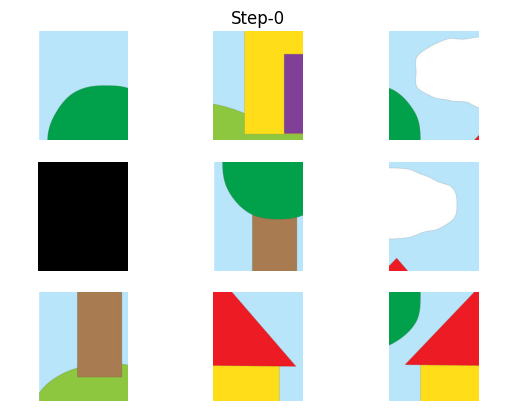

In [365]:
display_steps(0)

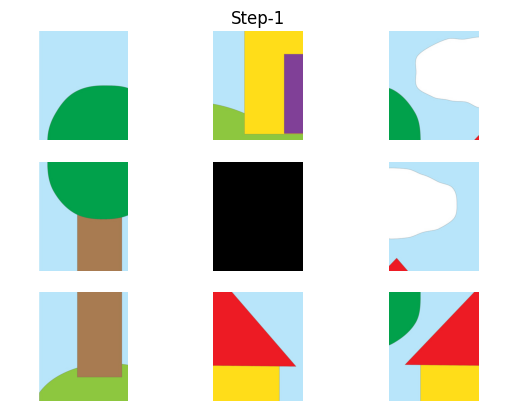

In [366]:
display_steps(1)

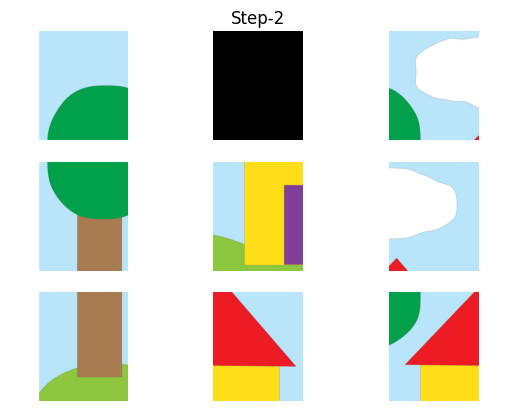

In [367]:
display_steps(2)

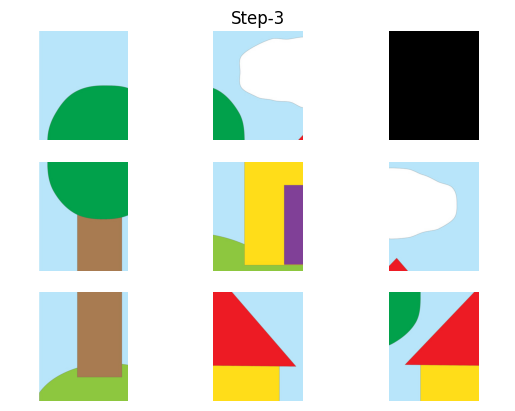

In [368]:
display_steps(3)

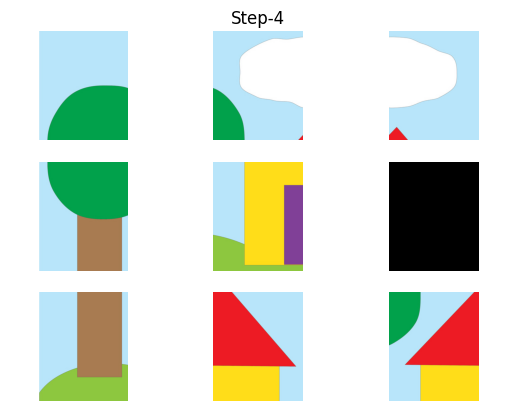

In [369]:
display_steps(4)

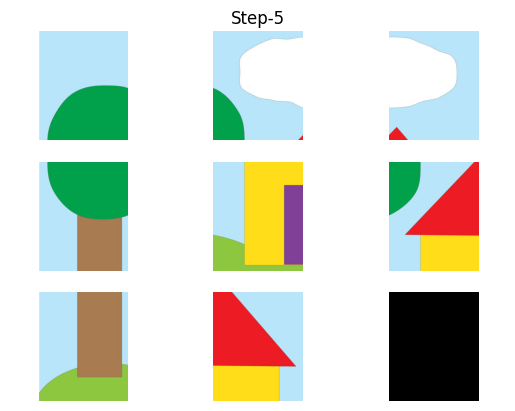

In [370]:
display_steps(5)

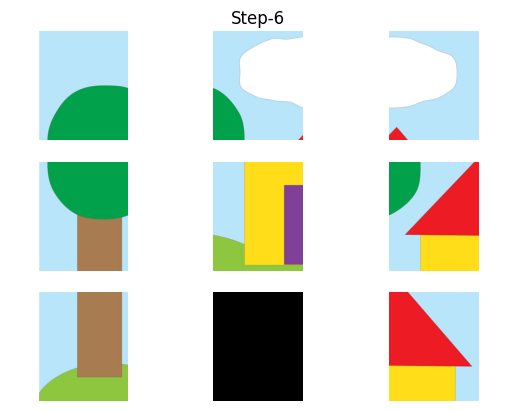

In [371]:
display_steps(6)

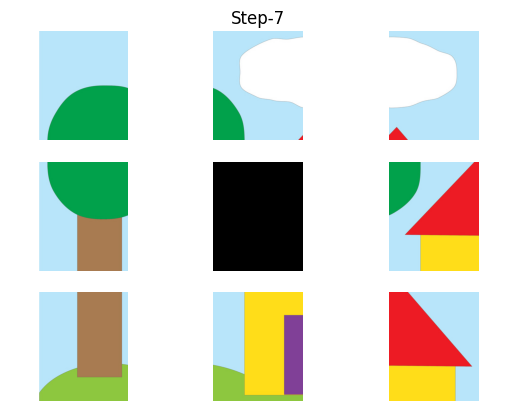

In [372]:
display_steps(7)

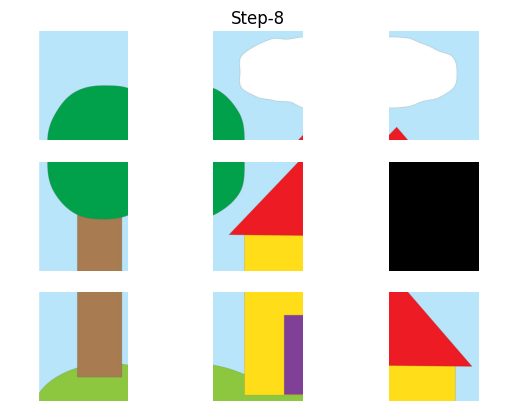

In [373]:
display_steps(8)

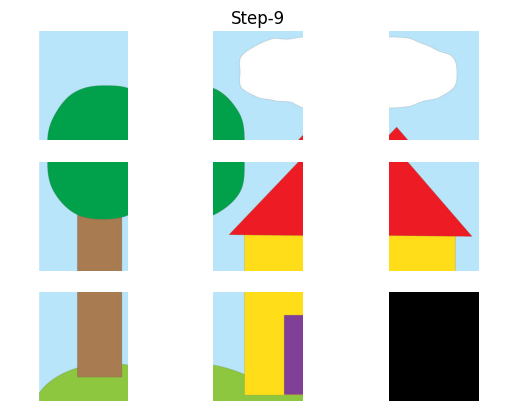

In [374]:
display_steps(9)

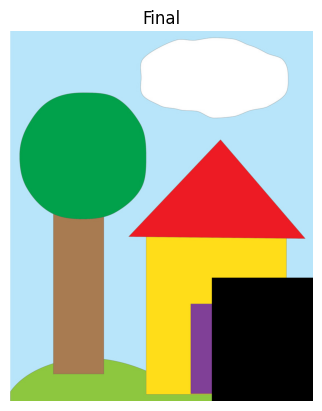

In [386]:
# Final,combined image

#combining image
img_list={}
for val in flow[-1]:
    img_list[int(val)]=image_parts[int(val)]
    
import cv2
val=[1,4,7]
row_imgs=[]
for i in val:
    # if(i!=6):
    img=np.hstack((img_list[i],img_list[i+1],img_list[i+2]))
    # else:
        # img=np.hstack((img_list[i],img_list[i+1]))


    row_imgs.append(img)

combine=np.vstack((row_imgs[0],row_imgs[1],row_imgs[2]))
plt.axis("off")
plt.title("Final")
plt.imshow(combine)